In [58]:
from google.colab import files
uploaded = files.upload()

Saving irisbin.csv to irisbin (3).csv


En este código lo que se realiza son 5 diferentes formas de Particionar Información, esto es interesante ya que para aplicación de diferentes metodos para poder manipular los datos de dicha información muchas veces es necesario el particionarla correctamente para poder aplicar dicha metodología de forma precisa.

Los 5 metodos con los que he realizado esta Particion de la información son:

**Partición Aleatoria:**

> Este método implica dividir aleatoriamente el conjunto de datos en conjuntos de entrenamiento y prueba. La división se realiza de forma aleatoria y puede variar cada vez que se realiza el proceso de partición.


**Partición por Densidad:**

> Esta técnica ordena los datos según las etiquetas o clases y luego divide el conjunto de datos en conjuntos de entrenamiento y prueba manteniendo esa distribución ordenada. El objetivo es mantener la proporción de las clases en ambos conjuntos.

**Partición Secuencial:**

> En este enfoque, los datos se dividen secuencialmente en conjuntos de entrenamiento y prueba. Por ejemplo, se pueden tomar los primeros N porcentajes de datos para entrenamiento y el resto para prueba.

**Partición Estratificada:**

> Esta técnica es similar a la partición por densidad pero se enfoca específicamente en mantener la proporción de clases en ambos conjuntos de manera más estratégica. Es útil cuando se tienen conjuntos de datos desequilibrados, asegurando que la distribución de clases sea similar en ambos conjuntos.

**Partición Usando Validación Cruzada:**

> La validación cruzada es una técnica para evaluar la capacidad de generalización de un modelo. Uno de sus métodos, como k-fold cross-validation, divide el conjunto de datos en k subconjuntos, utilizando cada uno de ellos como conjunto de prueba mientras se entrena el modelo con el resto. Esto se repite k veces, lo que permite evaluar el rendimiento del modelo en diferentes conjuntos de prueba.

Estas técnicas de partición son fundamentales para evaluar modelos de machine learning, asegurando una buena generalización y minimizando sesgos en la evaluación del rendimiento del modelo. La elección de la técnica adecuada puede depender de factores como el tamaño del conjunto de datos, la distribución de clases y el tipo de problema de machine learning que se está abordando.

*******************Bienvenido al Generador de Particiones de Informaicón*******************
--------------------------Metodos para Particionar la Información--------------------------

1.- Partición Aleatoría
2.- Partición por Densidad
3.- Partición Secuencial
4.- Particion Estratificada
5.- Particion Usando Validación Cruzada

¿Que Metodo Desea Usar para las Particiones? 2

¿Cual Será el Porcentaje de la Partición Principal? (1 - 99 ) 80

Ingrese el número de particiones: 4

Ingrese el porcentaje de datos de entrenamiento posteriores (1 - 99): 60







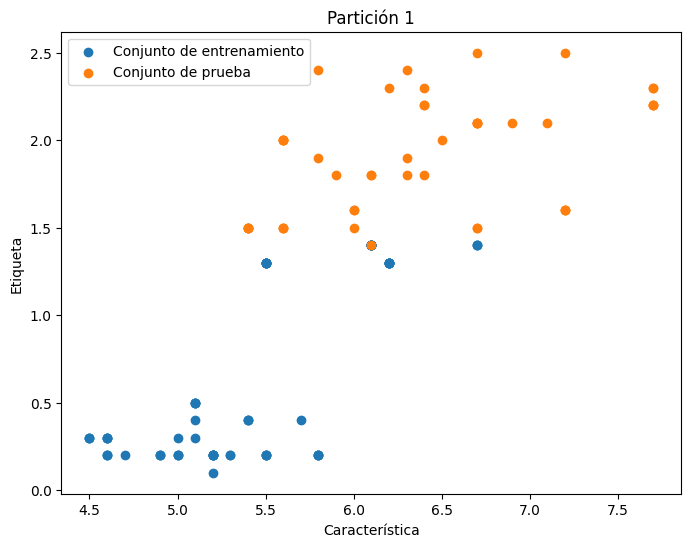



Tamaño del conjunto de entrenamiento:  71
Tamaño del conjunto de prueba:  48 




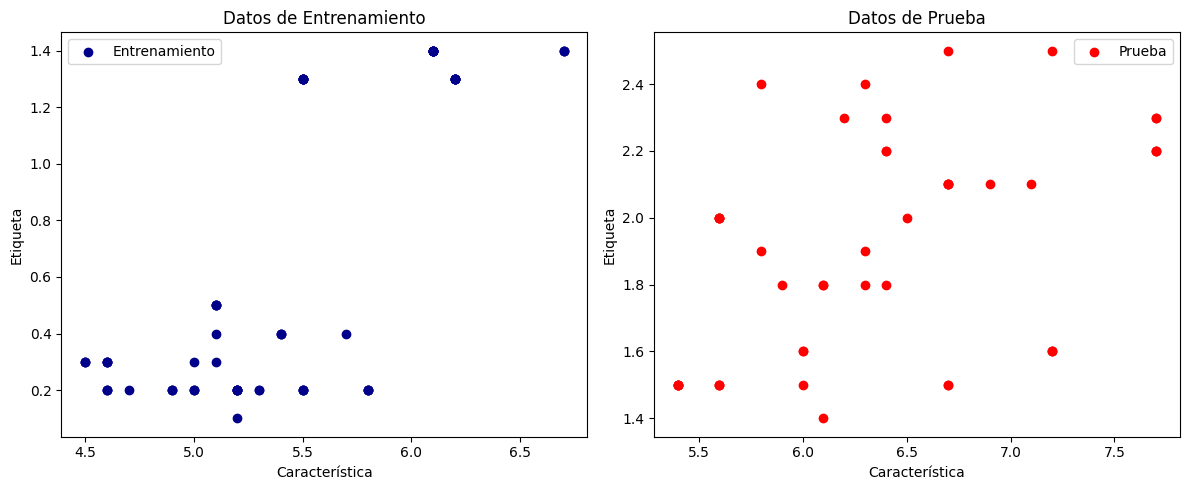

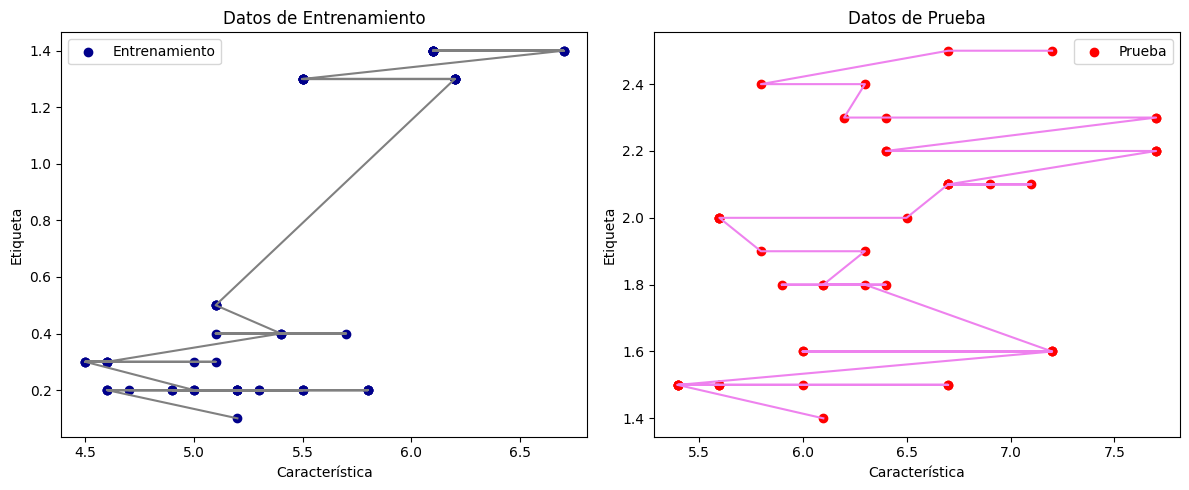

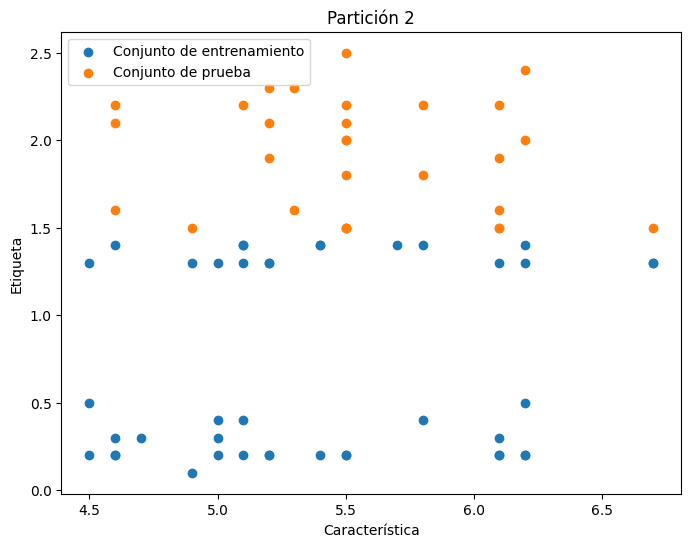



Tamaño del conjunto de entrenamiento:  42
Tamaño del conjunto de prueba:  29 




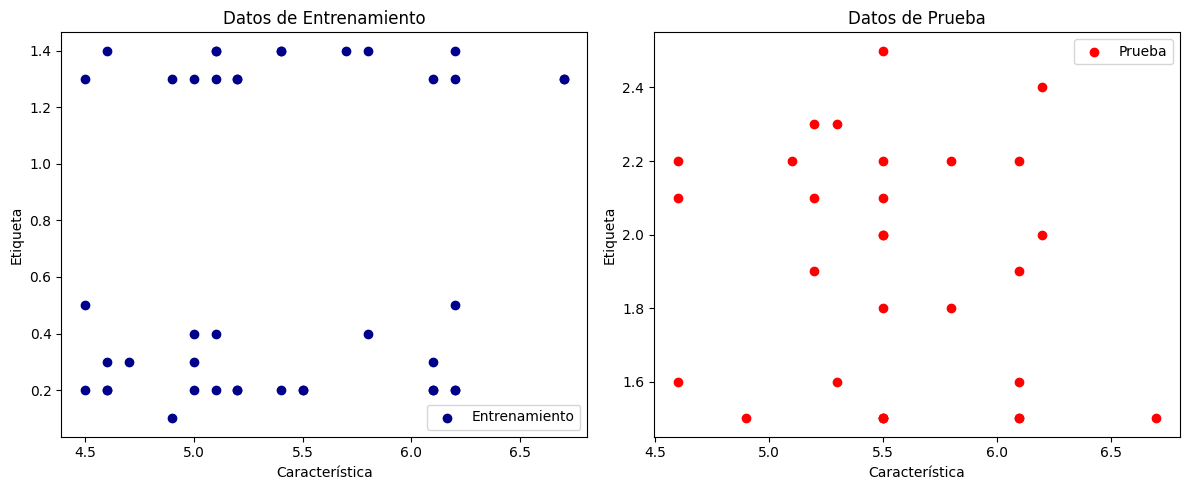

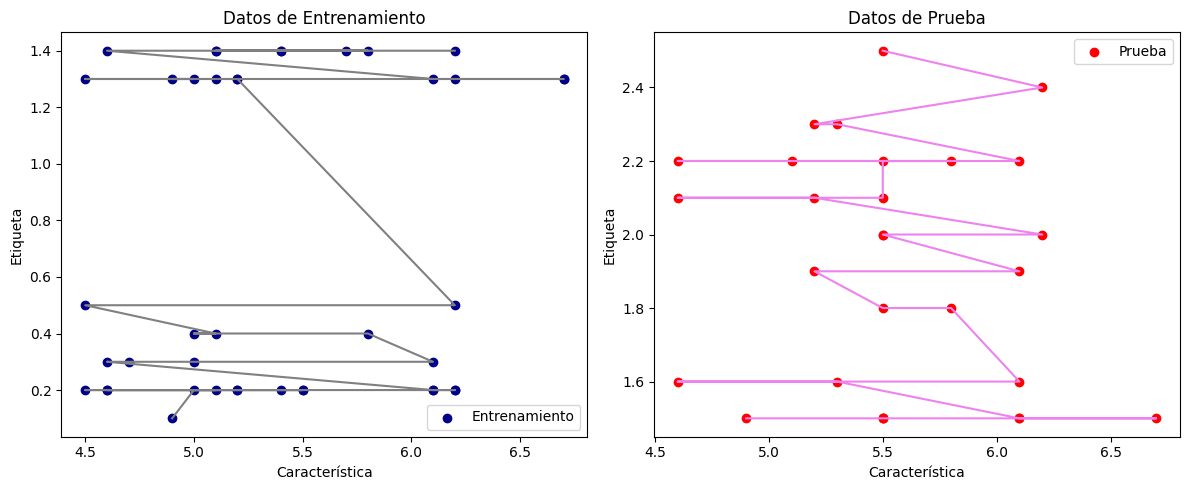

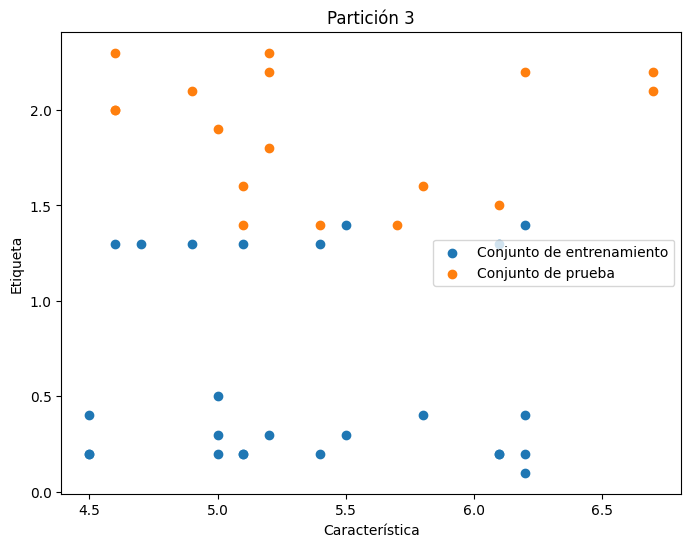



Tamaño del conjunto de entrenamiento:  25
Tamaño del conjunto de prueba:  17 




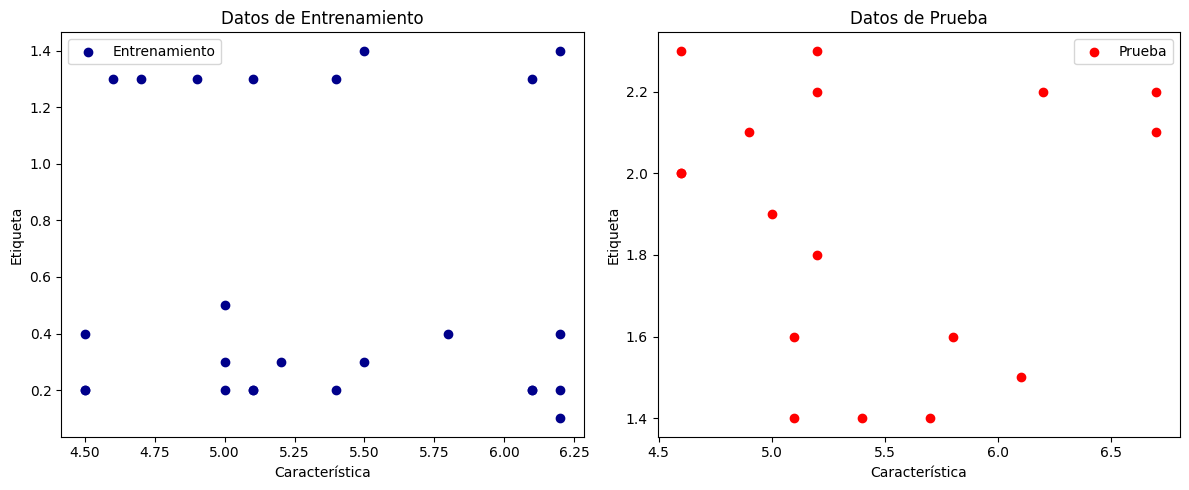

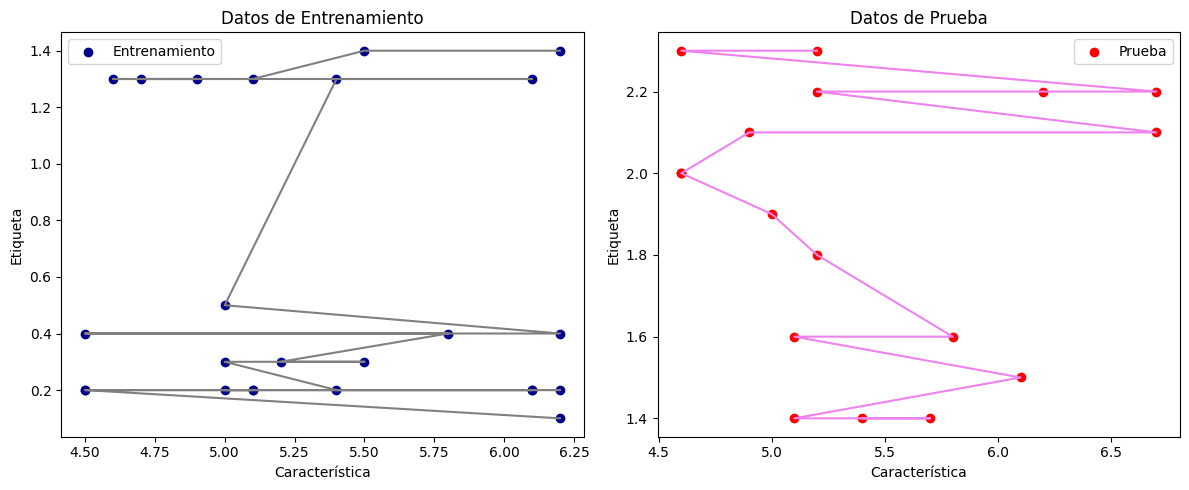

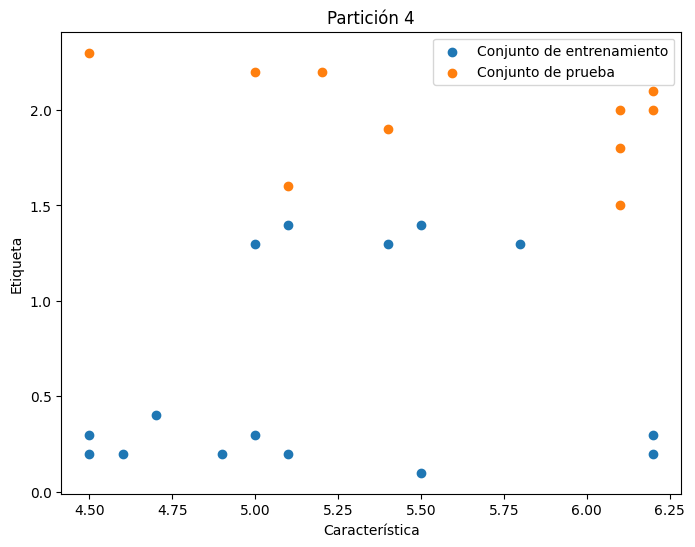



Tamaño del conjunto de entrenamiento:  15
Tamaño del conjunto de prueba:  10 




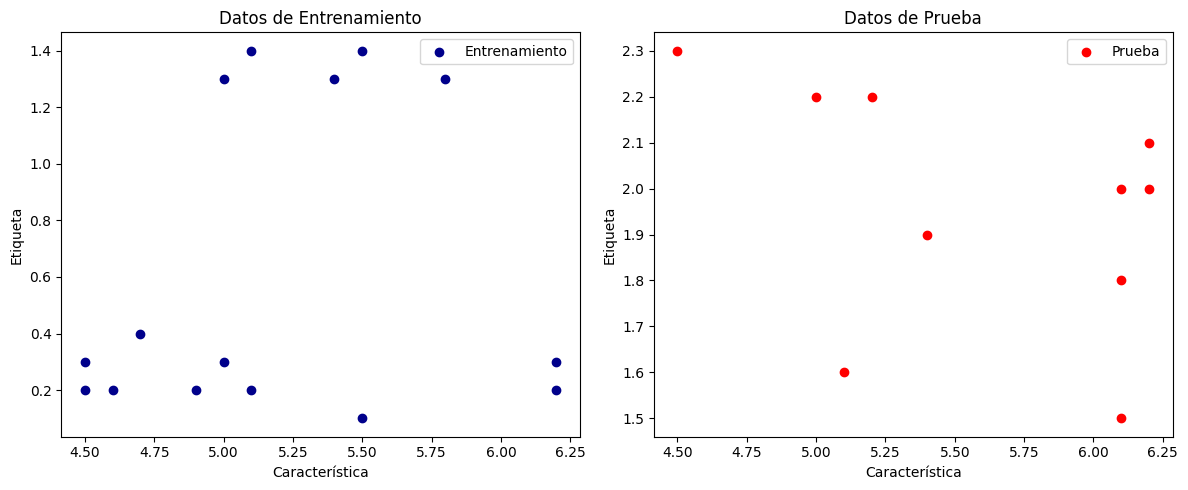

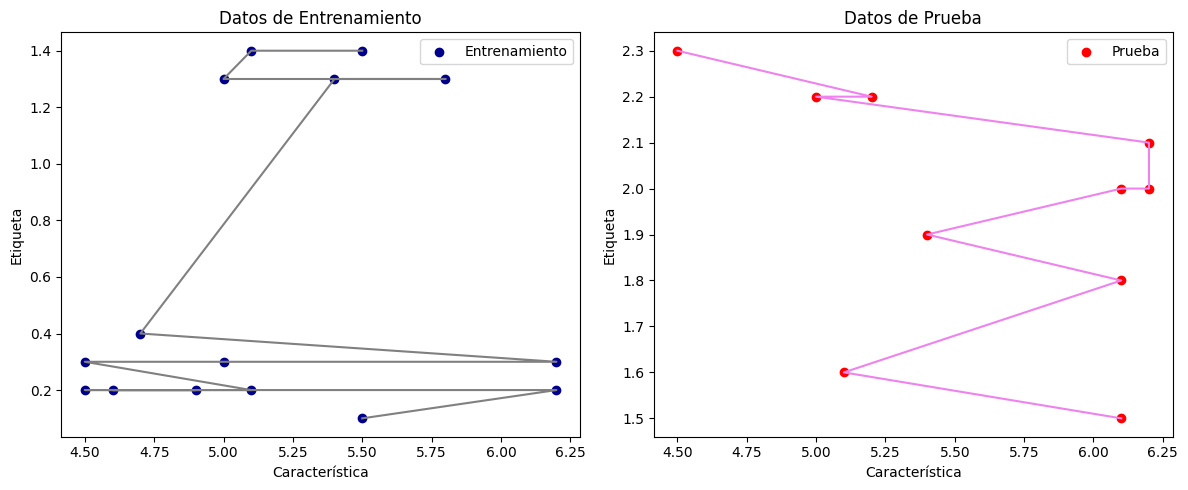

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Cargar Datos
dataset = pd.read_csv('irisbin.csv')

# Función para pedir al usuario los parámetros
def obtener_parametros():
    print("--------------------------Metodos para Particionar la Información--------------------------""\n")
    print("1.- Partición Aleatoría")
    print("2.- Partición por Densidad")
    print("3.- Partición Secuencial")
    print("4.- Particion Estratificada")
    print("5.- Particion Usando Validación Cruzada")

    method = int(input("\n¿Que Metodo Desea Usar para las Particiones? "))
    percent = int(input("\n¿Cual Será el Porcentaje de la Partición Principal? (1 - 99 ) "))
    num_particiones = int(input("\nIngrese el número de particiones: "))
    porcentaje_entrenamiento = int(input("\nIngrese el porcentaje de datos de entrenamiento posteriores (1 - 99): "))
    return num_particiones, porcentaje_entrenamiento / 100, method, percent / 100


def graph(x1, y1, x2, y2, i):

   print("\n\n\n\n")

   plt.figure(figsize=(8, 6))
   plt.scatter(x1, y1, label='Conjunto de entrenamiento')
   plt.scatter(x2, y2, label='Conjunto de prueba')
   plt.xlabel('Característica')
   plt.ylabel('Etiqueta')
   plt.title(f'Partición {i + 1}')
   plt.legend()
   plt.show()

   print("\n\nTamaño del conjunto de entrenamiento: ", len(x1))
   print("Tamaño del conjunto de prueba: ", len(x2), "\n\n")

   plt.figure(figsize=(12, 5))

   plt.subplot(1, 2, 1)
   plt.scatter(x1, y1, label='Entrenamiento', marker='o', color='darkblue')
   plt.title('Datos de Entrenamiento')
   plt.xlabel('Característica')
   plt.ylabel('Etiqueta')
   plt.legend()

   plt.subplot(1, 2, 2)
   plt.scatter(x2, y2, label='Prueba', marker='o', color='red')
   plt.title('Datos de Prueba')
   plt.xlabel('Característica')
   plt.ylabel('Etiqueta')
   plt.legend()

   plt.tight_layout()
   plt.show()

   plt.figure(figsize=(12, 5))

   plt.subplot(1, 2, 1)
   plt.scatter(x1, y1, label='Entrenamiento', marker='o', color='darkblue')
   plt.plot(x1, y1, linestyle='-', color='grey')  # Conexión de puntos
   plt.title('Datos de Entrenamiento')
   plt.xlabel('Característica')
   plt.ylabel('Etiqueta')
   plt.legend()

   plt.subplot(1, 2, 2)
   plt.scatter(x2, y2, label='Prueba', marker='o', color='red')
   plt.plot(x2, y2, linestyle='-', color='violet')  # Conexión de puntos
   plt.title('Datos de Prueba')
   plt.xlabel('Característica')
   plt.ylabel('Etiqueta')
   plt.legend()

   plt.tight_layout()
   plt.show()



def particion_aleatoria(X, y, porcentaje_particion):
    # Obtener el tamaño de la partición según el porcentaje dado
    tamaño_particion = int(len(X) * porcentaje_particion)

    # Concatenar las características y las etiquetas
    data = list(zip(X, y))

    # Mezclar aleatoriamente los elementos de la lista
    random.shuffle(data)

    # Dividir el dataset en conjuntos de entrenamiento y prueba por densidad
    conjunto_entrenamiento = data[:tamaño_particion]
    conjunto_prueba = data[tamaño_particion:]

    # Separar las características y las etiquetas en los conjuntos de entrenamiento y prueba
    X_entrenamiento = [sample[0] for sample in conjunto_entrenamiento]
    y_entrenamiento = [sample[1] for sample in conjunto_entrenamiento]

    X_prueba = [sample[0] for sample in conjunto_prueba]
    y_prueba = [sample[1] for sample in conjunto_prueba]

    return (X_entrenamiento, X_prueba), (y_entrenamiento, y_prueba)



def particion_por_densidad(X, y, porcentaje_particion):
    # Obtener el tamaño de la partición según el porcentaje dado
    tamaño_particion = int(len(X) * porcentaje_particion)

    # Concatenar las características y las etiquetas
    data = list(zip(X, y))

    # Ordenar el dataset por las etiquetas (si es una tarea de clasificación)
    data.sort(key=lambda x: x[1])  # Ordenar por etiqueta

    # Dividir el dataset en conjuntos de entrenamiento y prueba por densidad
    conjunto_entrenamiento = data[:tamaño_particion]
    conjunto_prueba = data[tamaño_particion:]

    # Separar las características y las etiquetas en los conjuntos de entrenamiento y prueba
    X_entrenamiento = [sample[0] for sample in conjunto_entrenamiento]
    y_entrenamiento = [sample[1] for sample in conjunto_entrenamiento]

    X_prueba = [sample[0] for sample in conjunto_prueba]
    y_prueba = [sample[1] for sample in conjunto_prueba]

    return (X_entrenamiento, X_prueba), (y_entrenamiento, y_prueba)



def particion_secuencial(X, y, porcentaje_particion):
    # Obtener el tamaño de la partición según el porcentaje dado
    tamaño_particion = int(len(X) * porcentaje_particion)

    # Dividir el dataset en conjuntos de entrenamiento y prueba secuencialmente
    X_entrenamiento = X[:tamaño_particion]
    y_entrenamiento = y[:tamaño_particion]

    # Asegurar que los índices para X_prueba y y_prueba no superen la longitud de los datos
    end_index = min(2 * tamaño_particion, len(X))
    X_prueba = X[tamaño_particion:end_index]
    y_prueba = y[tamaño_particion:end_index]

    return (X_entrenamiento, X_prueba), (y_entrenamiento, y_prueba)



def particion_estratificada(X, y, porcentaje_particion):
    # Obtener el tamaño de la partición según el porcentaje dado
    tamaño_particion = int(len(X) * porcentaje_particion)

    # Crear un diccionario para agrupar las características por etiquetas
    etiquetas = {}
    for i, etiqueta in enumerate(y):
        etiqueta_tuple = tuple(etiqueta)  # Convertir el array de NumPy a una tupla
        if etiqueta_tuple not in etiquetas:
            etiquetas[etiqueta_tuple] = []
        # Verificar si el índice está dentro del rango de X
        if i < len(X):
            etiquetas[etiqueta_tuple].append(X[i])

    # Inicializar las particiones
    conjunto_entrenamiento_X = []
    conjunto_prueba_X = []
    conjunto_entrenamiento_y = []
    conjunto_prueba_y = []

    # Dividir las características por etiqueta manteniendo la proporción en las particiones
    for etiqueta, datos in etiquetas.items():
        random.shuffle(datos)
        tamaño_entrenamiento = int(len(datos) * porcentaje_particion)
        conjunto_entrenamiento_X.extend(datos[:tamaño_entrenamiento])
        conjunto_prueba_X.extend(datos[tamaño_entrenamiento:])
        conjunto_entrenamiento_y.extend([etiqueta] * tamaño_entrenamiento)
        conjunto_prueba_y.extend([etiqueta] * (len(datos) - tamaño_entrenamiento))

    # Asegurar que las listas de características y etiquetas tengan la misma longitud
    min_len = min(len(conjunto_entrenamiento_X), len(conjunto_prueba_X))
    conjunto_entrenamiento_X = conjunto_entrenamiento_X[:min_len]
    conjunto_prueba_X = conjunto_prueba_X[:min_len]
    conjunto_entrenamiento_y = conjunto_entrenamiento_y[:min_len]
    conjunto_prueba_y = conjunto_prueba_y[:min_len]

    return (conjunto_entrenamiento_X, conjunto_prueba_X), (conjunto_entrenamiento_y, conjunto_prueba_y)



def particion_cruzada(X, y, num_folds):
    # Calcular el tamaño de cada fold
    tamaño_fold = len(X) // num_folds

    # Listas para almacenar los conjuntos de entrenamiento y prueba de cada fold
    conjuntos_entrenamiento_X = []
    conjuntos_prueba_X = []
    conjuntos_entrenamiento_Y = []
    conjuntos_prueba_Y = []

    # Iterar a través de los folds
    for i in range(num_folds):
        # Calcular los índices para el fold actual
        inicio = i * tamaño_fold
        fin = inicio + tamaño_fold

        # Seleccionar el fold actual como conjunto de prueba y el resto como conjunto de entrenamiento
        conjunto_prueba_X = X[inicio:fin]
        conjunto_prueba_Y = y[inicio:fin]

        conjunto_entrenamiento_X = X[:inicio] + X[fin:]
        conjunto_entrenamiento_Y = y[:inicio] + y[fin:]


        # Almacenar los conjuntos de entrenamiento y prueba en listas
        conjuntos_entrenamiento_X.append(conjunto_entrenamiento_X)
        conjuntos_prueba_X.append(conjunto_prueba_X)
        conjuntos_entrenamiento_Y.append(conjunto_entrenamiento_Y)
        conjuntos_prueba_Y.append(conjunto_prueba_Y)

    return (conjuntos_entrenamiento_X, conjuntos_prueba_X), (conjuntos_entrenamiento_Y, conjuntos_prueba_Y)




# Ejemplo interactivo
print("*******************Bienvenido al Generador de Particiones de Informaicón*******************")
num_particiones, porcentaje_entrenamiento, method, percent = obtener_parametros()

particiones_generadas = []


X_copy = dataset.iloc[:, 0].values.copy()
Y_copy = dataset.iloc[:, 3].values.copy()

X_copy = X_copy.reshape(-1, 1)  # Reshape para que sea un array 2D para su uso posterior
Y_copy = Y_copy.reshape(-1, 1)  # Reshape para que sea un array 2D para su uso posterior

X_entre, Y_entre = particion_aleatoria(X_copy, Y_copy, percent)
particiones_generadas.append([X_entre, Y_entre])



def do_partition(partitions, porcentaje_entrenamiento, X_train, method, particiones_generadas, Y_train):
    name_method =""
    dataframes_list = []

    for i in range(partitions):

        if (len(X_train) == 1):
            print("No se puede particionar más")
            return dataframes_list

        if method == 1:
            name_method = "Partición Aleatoria"
            x_set, y_set = particion_aleatoria(X_train, Y_train, porcentaje_entrenamiento)
            graph(x_set[0], y_set[0], x_set[1], y_set[1], i)

        elif method == 2:
            name_method = "Partición por Densidad"
            x_set, y_set = particion_por_densidad(X_train, Y_train, porcentaje_entrenamiento)
            graph(x_set[0], y_set[0], x_set[1], y_set[1], i)

        elif method == 3:
            name_method = "Partición Secuencial"
            x_set, y_set = particion_secuencial(X_train, Y_train, porcentaje_entrenamiento)
            graph(x_set[0], y_set[0], x_set[1], y_set[1], i)

        elif method == 4:
            name_method = "Particion Estratificada"
            x_set, y_set = particion_estratificada(X_train, Y_train, porcentaje_entrenamiento)
            graph(x_set[0], y_set[0], x_set[1], y_set[1], i)

        elif method == 5:
            name_method = "Método 5"
            num_folds = 5  # Número de folds para la Validación Cruzada
            x_set, y_set = particion_cruzada(X_train, Y_train, num_folds)
            graph(x_set[0], y_set[0], x_set[1], y_set[1], i)

        else:
            name_method = "Partición Aleatoria (por defecto)"
            num_folds = 5  # Número de folds para la Validación Cruzada
            x_set, y_set, = particion_aleatoria(X_train, Y_train, porcentaje_entrenamiento)
            graph(x_set[0], y_set[0], x_set[1], y_set[1])

        X_train = x_set[0]

do_partition(num_particiones, porcentaje_entrenamiento, X_entre[0], method, particiones_generadas, Y_entre[0])

